In [12]:
import numpy as np
# from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib inline
sns.set_style('ticks');
pal = sns.color_palette('Dark2', n_colors=2, desat=.6)
sns.set_palette(pal)
sns.set_context(context='paper', font_scale=1.5)


211


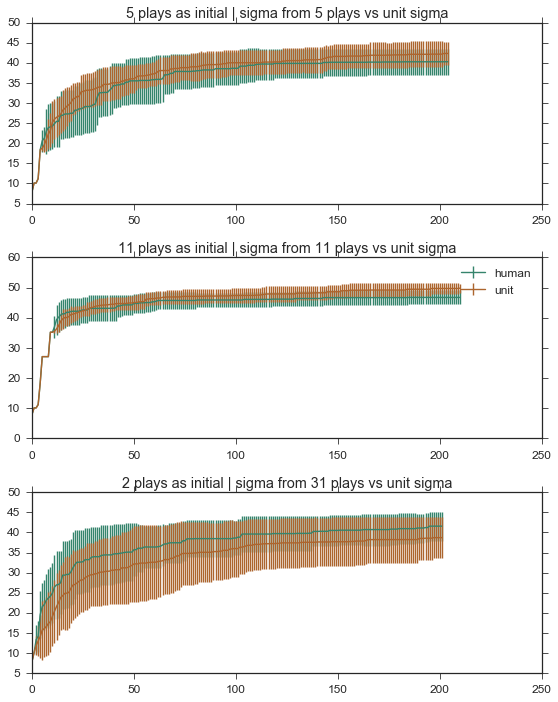

In [27]:
with open('simulation_04042016.npy', 'rb') as f:
    maxD = np.load(f)
print len(maxD[2][0])

score_5p = np.array([np.array(maxD[0][j]) for j in range(len(maxD[0]))])
mean_5p = np.mean(score_5p, axis = 0)
std_5p = np.std(score_5p, axis = 0)
score_5u = np.array([np.array(maxD[1][j]) for j in range(len(maxD[1]))])
mean_5u = np.mean(score_5u, axis = 0)
std_5u = np.std(score_5u, axis = 0)

score_11p = np.array([np.array(maxD[2][j]) for j in range(len(maxD[2]))])
mean_11p = np.mean(score_11p, axis = 0)
std_11p = np.std(score_11p, axis = 0)
score_11u = np.array([np.array(maxD[3][j]) for j in range(len(maxD[3]))])
mean_11u = np.mean(score_11u, axis = 0)
std_11u = np.std(score_11u, axis = 0)

score_31p = np.array([np.array(maxD[4][j]) for j in range(len(maxD[2]))])
mean_31p = np.mean(score_31p, axis = 0)
std_31p = np.std(score_31p, axis = 0)
score_31u = np.array([np.array(maxD[5][j]) for j in range(len(maxD[3]))])
mean_31u = np.mean(score_31u, axis = 0)
std_31u = np.std(score_31u, axis = 0)

plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.errorbar(range(mean_5p.size), mean_5p, yerr=std_5p)
plt.errorbar(range(mean_5u.size), mean_5u, yerr=std_5u)
plt.title('5 plays as initial | sigma from 5 plays vs unit sigma')

plt.subplot(3,1,2)
plt.errorbar(range(mean_11p.size), mean_11p, yerr=std_11p, label='human')
plt.errorbar(range(mean_11u.size), mean_11u, yerr=std_11u, label='unit')
plt.title('11 plays as initial | sigma from 11 plays vs unit sigma')
plt.legend()

plt.subplot(3,1,3)
plt.errorbar(range(mean_31p.size), mean_31p, yerr=std_31p)
plt.errorbar(range(mean_31u.size), mean_31u, yerr=std_31u)
plt.title('2 plays as initial | sigma from 31 plays vs unit sigma')

plt.tight_layout()
plt.show()

In [28]:
# opt_sig = pd.read_csv('NEW_sigma_player2.csv')[['trial '+str(i) for i in range(1,11)]]
# score_11p = np.array([np.array(maxD[2][j]) for j in range(len(maxD[2]))])
# print score_11p.shape
# opt_sig = pd.DataFrame(score_11p.T, columns=['trial '+str(i+1) for i in range(20)])

score_31p = np.array([np.array(maxD[4][j]) for j in range(len(maxD[2]))])
print score_31p.shape
opt_sig = pd.DataFrame(score_31p.T, columns=['trial '+str(i+1) for i in range(20)])


opt_sig.index.name='time'
opt_sig['Play No.']=range(opt_sig.shape[0])
opt_sig = pd.melt(opt_sig, id_vars=['Play No.'], value_name='Best Score')
opt_sig['Kernel Type'] = 'Human' 
opt_sig.head()
print opt_sig['Best Score'].max()

(20L, 202L)
49.2


In [30]:
# unit_sig = pd.read_csv('NEW_unit_sigma_player2.csv')[['trial '+str(i) for i in range(1,11)]]

score_31u = np.array([np.array(maxD[5][j]) for j in range(len(maxD[3]))])
unit_sig = pd.DataFrame(score_31u.T, columns=['trial '+str(i+1) for i in range(20)])

# score_11u = np.array([np.array(maxD[3][j]) for j in range(len(maxD[3]))])
# unit_sig = pd.DataFrame(score_11u.T, columns=['trial '+str(i+1) for i in range(20)])


unit_sig.index.name='time'
unit_sig['Play No.']=range(unit_sig.shape[0])
unit_sig = pd.melt(unit_sig, id_vars=['Play No.'], value_name='Best Score')
unit_sig['Kernel Type'] = 'Unit' 
unit_sig.head()
print unit_sig['Best Score'].max()

46.3


In [31]:
%run '../preprocess.py'
pre = Preprocess(all_dat='../all_games.pkl', pca_model='../eco_full_pca.pkl')

# pre = Preprocess()
# pre.get_json('alluser_control.json')  # uncomment this to create the pkl file needed!!
# pre.train_pca()

X, y = pre.ready_player_one(2)

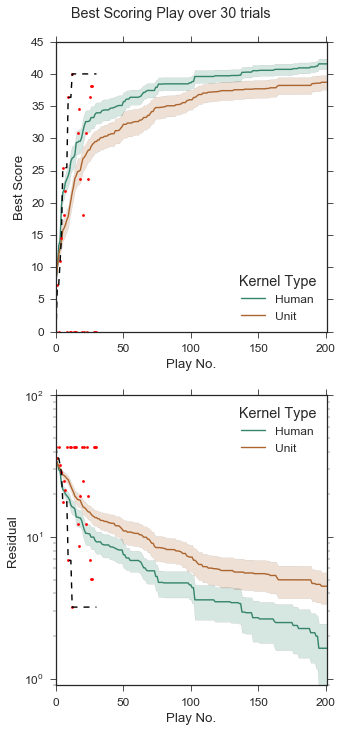

In [35]:
f,ax = plt.subplots(nrows = 2, figsize = (5,10))
sims = pd.concat([opt_sig, unit_sig])
sims['Residual'] = 43.2 - sims['Best Score']

sns.tsplot(sims, time='Play No.', unit='variable', value='Best Score', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], ax=ax[0], estimator=np.mean)
sns.tsplot(sims, time='Play No.', unit='variable', value='Residual', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], ax=ax[1], estimator=np.mean)
ax[1].set_yscale("log", nonposy='clip')
ax[1].set_ylim(.9,100)
f.suptitle('Best Scoring Play over 30 trials', y=1.02)

# print [np.max(y[:i]) for i in range(1,len(y)+1)]
y_res = np.array([np.max(y[:i]) for i in range(1,len(y)+1)])
ax[0].plot(y, 'r.')
ax[0].plot(y_res, 'k--')

ax[1].plot(43.2-y, 'r.')
ax[1].plot(43.2-y_res, 'k--')
# plt.text()
plt.tight_layout()
# sns.tsplot(unit_sig.T.values, color=pal[1], ci=[68], err_style=['ci_band'])

40.9090909091


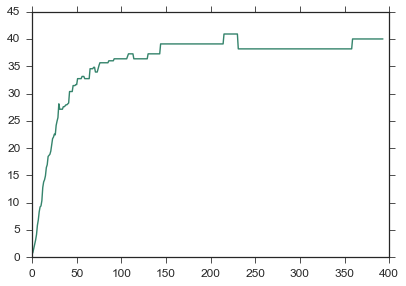

In [36]:
roll_max = lambda y: np.array([np.max(y[:i]) for i in range(1,len(y)+1)])

mult=pd.pivot_table(pre.full_tab, index=['userid','id'])
mult.xs(1)
for i in range(1,213):
# #     mult.xs(i)['Play No.'] = range(len(mult.xs(i)))
    mult.loc[(slice(i,i),slice(None)),'Play No.'] = range(len(mult.loc[(slice(i,i),slice(None)),:]))
    mult.loc[(slice(i,i),slice(None)),'curr_best'] = roll_max(mult.loc[(slice(i,i),slice(None)),'rem_nrg'].values)
    
p_avg = mult.groupby(['Play No.'])['curr_best'].mean().values
p_max = mult.groupby(['Play No.'])['curr_best'].mean().values

plt.plot(p_avg)
mult.reset_index(inplace=True)  # remove multiindex
print p_avg.max()

In [37]:
import scikits.bootstrap as boot  
lo_hi = np.zeros((201,2))
for i in range(201):
     lo_hi[i] = boot.ci(mult[mult['Play No.']==i]['curr_best'].values, np.mean, alpha=.32)
lo_hi

array([[  0.30052592,   0.88655147],
       [  0.63006301,   1.26012601],
       [  1.2539185 ,   2.17345873],
       [  1.93624557,   3.16410862],
       [  2.54047323,   3.93524284],
       [  3.32867133,   5.14685315],
       [  4.93066256,   7.05701079],
       [  5.6993007 ,   8.14685315],
       [  7.08719852,   9.75881262],
       [  7.86561265,  10.75098814],
       [  8.00865801,  10.995671  ],
       [  8.90909091,  12.        ],
       [ 11.16883117,  14.5974026 ],
       [ 12.13903743,  15.6684492 ],
       [ 12.37536657,  16.18768328],
       [ 12.97805643,  16.92789969],
       [ 14.54545455,  18.37662338],
       [ 15.        ,  18.83116883],
       [ 16.64335664,  20.20979021],
       [ 16.78321678,  20.41958042],
       [ 16.81818182,  20.75757576],
       [ 17.39130435,  21.34387352],
       [ 18.59504132,  22.47933884],
       [ 19.54545455,  23.90909091],
       [ 19.71291866,  24.11483254],
       [ 19.89304813,  24.9197861 ],
       [ 19.63636364,  24.96969697],
 

(201L,)


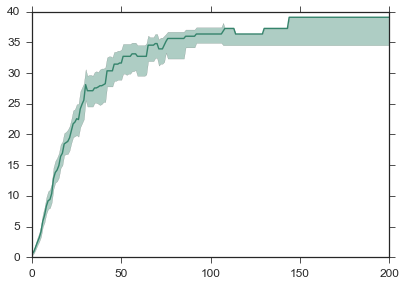

In [38]:
# mult.reset_index(inplace=True)
mult.groupby('Play No.')['curr_best'].std().loc[:200]
p_avg = mult[mult['Play No.']<=200.].groupby('Play No.')['curr_best'].mean()
p_std = mult[mult['Play No.']<=200.].groupby('Play No.')['curr_best'].std()
plt.plot(p_avg)
print p_avg.shape
plt.fill_between(range(201), lo_hi[:,0],lo_hi[:,1], alpha=.4)
# sns.tsplot(mult[mult['Play No.']<=200.], time='Play No.', unit='userid', value='curr_best',
#            ci=[68], err_style=['ci_band'], legend=False, estimator=np.mean)

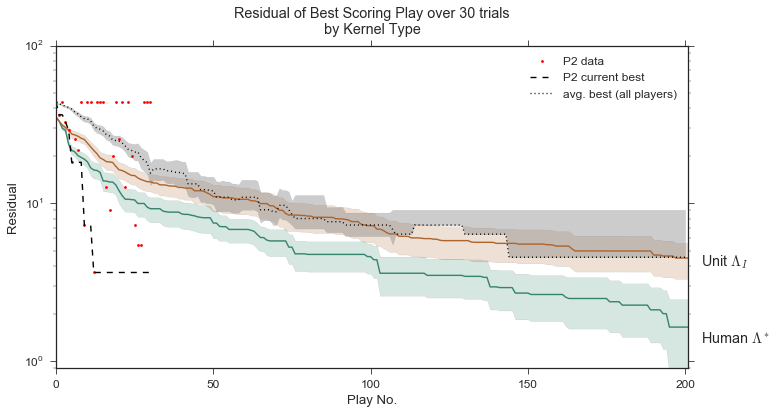

In [39]:
plt.figure(figsize=(10,6))
sns.tsplot(sims, time='Play No.', unit='variable', value='Residual', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], legend=False, estimator=np.mean)
plt.semilogy(43.64-y, 'r.', label='P2 data')
plt.plot(43.64-y_res, 'k--', label='P2 current best')

plt.plot(43.64-p_avg, 'k:', label='avg. best (all players)')
plt.fill_between(range(201), 43.64-lo_hi[:,0],43.64-lo_hi[:,1], alpha=.4, color='gray')

plt.title('Residual of Best Scoring Play over 30 trials\nby Kernel Type', y=1.02)
# plt.yscale('log')
plt.ylim(.9,100)
plt.text(205,1.3,'Human $\Lambda^*$')
plt.text(205,4,'Unit $\Lambda_I$')
plt.legend()
plt.tight_layout()

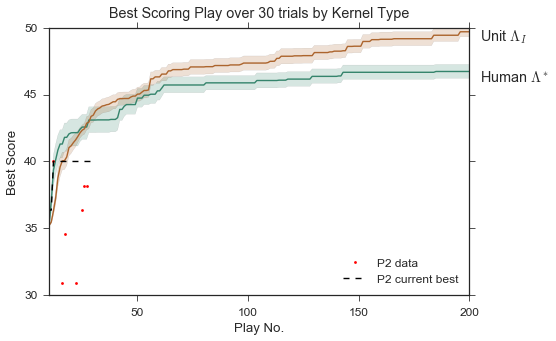

In [21]:
##43.64  # for train on 31
##52.5  # for train on 11
plt.figure(figsize=(7,5))
sns.tsplot(sims, time='Play No.', unit='variable', value='Best Score', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], legend=False, estimator=np.mean)
plt.plot(y, 'r.', label='P2 data')
plt.plot(y_res, 'k--', label='P2 current best')

# plt.plot(p_avg, 'k:', label='avg. best (all players)')
# plt.fill_between(range(201), lo_hi[:,0],lo_hi[:,1], alpha=.4, color='gray')

plt.title('Best Scoring Play over 30 trials by Kernel Type', y=1.02)
# plt.yscale('log')
plt.ylim(30,50)
plt.xlim(10,200)
plt.text(205,46,'Human $\Lambda^*$')
plt.text(205,49,'Unit $\Lambda_I$')
plt.legend(loc=4)
plt.tight_layout()

In [20]:
mult['id'].max()

2445

# OLD Data

In [19]:
opt_sig = pd.read_csv('NEW_sigma_player2.csv')[['trial '+str(i) for i in range(1,11)]]
opt_sig.index.name='time'
# print opt_sig.head()
opt_sig['Play No.']=range(opt_sig.shape[0])
opt_sig = pd.melt(opt_sig, id_vars=['Play No.'], value_name='Best Score')
opt_sig['Kernel Type'] = 'Human' 
opt_sig.head()

      trial 1  trial 2  trial 3  trial 4  trial 5  trial 6  trial 7  trial 8  \
time                                                                           
0         8.0      8.0      8.0      8.0      8.0      8.0      8.0      8.0   
1        10.1     10.1     10.1     10.1     10.1     10.1     10.1     10.1   
2        10.1     10.1     11.1     27.5     10.1     13.3     10.1     15.3   
3        10.1     10.5     11.1     27.5     10.1     13.3     10.1     21.8   
4        10.1     10.5     11.1     27.5     10.1     13.3     21.1     32.1   

      trial 9  trial 10  
time                     
0         8.0       8.0  
1        10.1      10.1  
2        10.1      14.6  
3        10.1      17.0  
4        17.4      25.0  


,Play No.,variable,Best Score,Kernel Type
0,0,trial 1,8.0,Human
1,1,trial 1,10.1,Human
2,2,trial 1,10.1,Human
3,3,trial 1,10.1,Human
4,4,trial 1,10.1,Human


In [3]:
unit_sig = pd.read_csv('NEW_unit_sigma_player2.csv')[['trial '+str(i) for i in range(1,11)]]
unit_sig.index.name='time'
unit_sig['Play No.']=range(unit_sig.shape[0])
unit_sig = pd.melt(unit_sig, id_vars=['Play No.'], value_name='Best Score')
unit_sig['Kernel Type'] = 'Unit' 

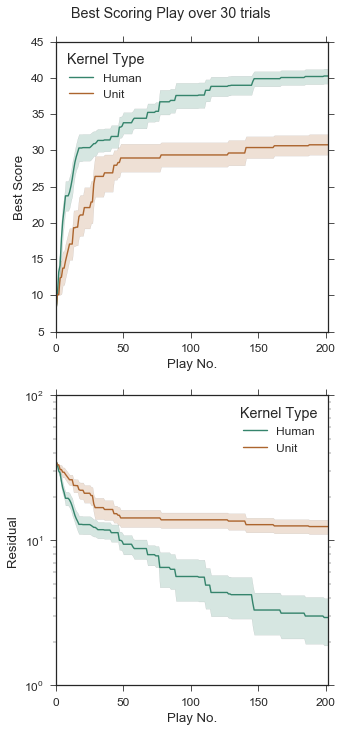

In [4]:
f,ax = plt.subplots(nrows = 2, figsize = (5,10))
sims = pd.concat([opt_sig, unit_sig])
sims['Residual'] = 43.2 - sims['Best Score']

sns.tsplot(sims, time='Play No.', unit='variable', value='Best Score', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], ax=ax[0])
sns.tsplot(sims, time='Play No.', unit='variable', value='Residual', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], ax=ax[1])
ax[1].set_yscale("log", nonposy='clip')
f.suptitle('Best Scoring Play over 30 trials', y=1.02)
plt.tight_layout()
# sns.tsplot(unit_sig.T.values, color=pal[1], ci=[68], err_style=['ci_band'])

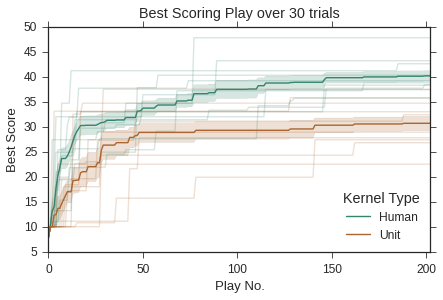

In [10]:
sns.tsplot(sims, time='Play No.', unit='variable', value='Best Score', condition='Kernel Type',
           ci=[68], err_style=['ci_band', 'unit_traces'])
plt.title('Best Scoring Play over 30 trials', y=1.02)
plt.tight_layout()

TypeError: cannot concatenate 'str' and 'int' objects

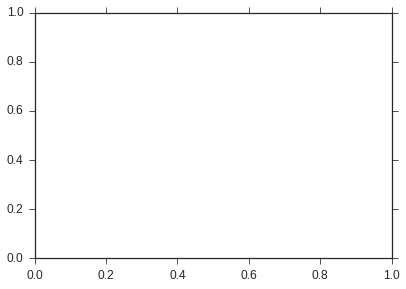

In [11]:
sns.tsplot(unit_sig.T.values, color='r', err_style='unit_traces')
plt.ylim(5,50)

<IPython.core.display.Javascript object>


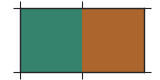

In [12]:
sns.choose_colorbrewer_palette('q')

In [22]:
sims[sims['Lambda']=='Human']['Score Log-Convergence'].shape

(2030L,)

<IPython.core.display.Javascript object>


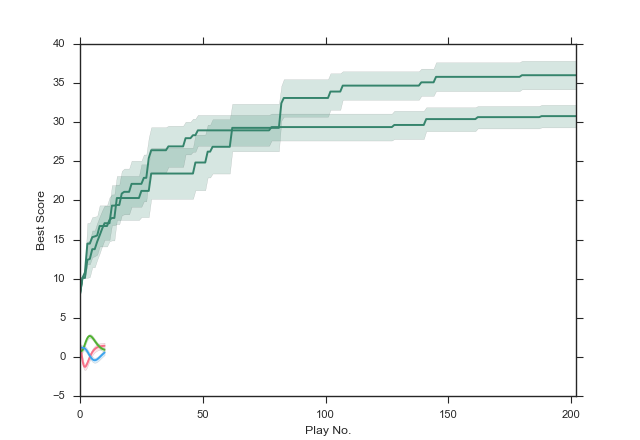

In [40]:
gam = sns.load_dataset('gammas')
sns.tsplot(time="timepoint", value="BOLD signal",
           unit="subject", condition="ROI",
           data=gam)

In [41]:
gam

,timepoint,ROI,subject,BOLD signal
0,0,IPS,0,0.513433
1,0,IPS,1,-0.414368
2,0,IPS,2,0.214695
3,0,IPS,3,0.814809
4,0,IPS,4,-0.894992
5,0,IPS,5,-0.073709
6,0,IPS,6,3.542734
7,0,IPS,7,0.080169
8,0,IPS,8,1.547083
9,0,IPS,9,2.827153
